In [1]:
import sys
import numpy as np
import pandas as pd
from agents.agent import DDPG
from agents.task import track

num_episodes = 1000
init_pos=np.array([35.])
target_pos = np.array([40.])
task = track(init_pose=init_pos,target_pos=target_pos)
agent = DDPG(task) 
print('init dist = ' +  str(task.init_dist))
rewards=[]
all_position=[]
all_actions=[]
dist=[]
position=[]
best_score=-10000000
worst_score=10000000
for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    score=0
    action_sum=0
    while True:
        action = agent.act(state)
        action_sum+=action[0]
        next_state, reward, done = task.step(action)
        score+=reward
        agent.step(action,reward,next_state, done)
        state = next_state
        if done:
            if score > best_score:
                best_score=score
                i_best=i_episode
            if score < worst_score:
                worst_score=score
                i_worst=i_episode
                
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}) (worst = {:7.3f})".format(
                i_episode, score, best_score, worst_score), end="")  # [debug]
            rewards.append(score)
            position.append(task.sim.pose)
            dist.append(task.dist)
            #all_position.append(position)
            all_actions.append(action_sum)
            break
    sys.stdout.flush()

Using TensorFlow backend.


init dist = 5.0
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
init dist = 5.0
Episode = 1000, score = -17.939 (best =  31.282) (worst = -33.026)

# Plot best vs worst performance

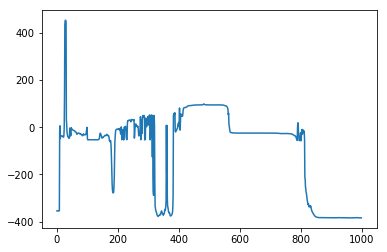

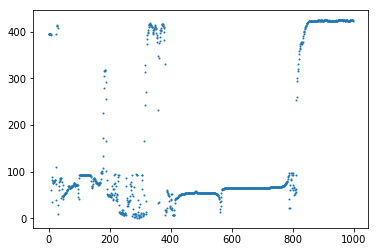

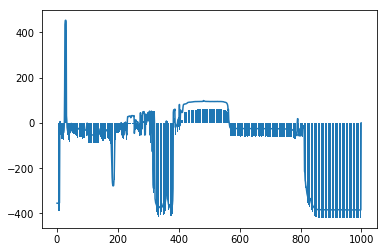

In [4]:
import matplotlib.pyplot as plt



ypos=[]
xpos=[]

#for pos in all_position[i_worst-1]:
 #   ypos.append(pos[1])
  #  xpos.append(pos[0])

#plt.plot(xdata,ydata)
ypos=[]
xpos=[]
yaction=[]
xaction=[]
xdist=[]
for i in range(1,num_episodes):
    #ypos.append(position[i][1])
    xpos.append(position[i][0])
    xdist.append(dist[i])
#xaction=all_actions[i_best-1]
# Data for three-dimensional scattered points worst case
#plt.scatter(xpos,ypos,s=1)
plt.plot(xpos)
plt.figure()
plt.scatter(range(len(xdist)),xdist,s=1)


x= np.arange(num_episodes)
y1=xpos
y2 = all_actions

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x,y1+[0])
ax.bar(x,y2)
plt.show()

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

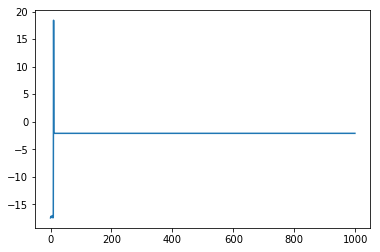

In [4]:
import matplotlib.pyplot as plt
plt.plot(rewards)